In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models


In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

print("Train shape:", train_images.shape)
print("Test shape:", test_images.shape)


Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [3]:
# Define class names (optional, for visualization)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


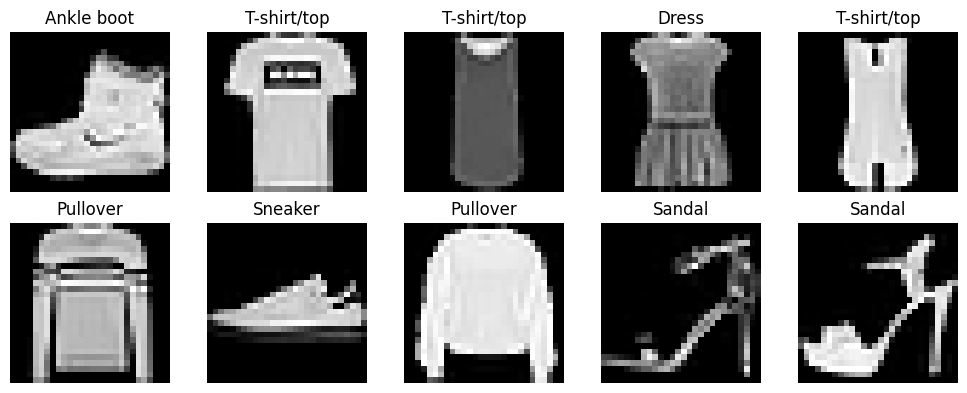

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Define a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') 
])


c:\Users\DELL\Desktop\Sharif_DL_Project\dlenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train 
history = model.fit(train_images, train_labels, epochs=10,
                    validation_split=0.1, batch_size=64, verbose=1)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8034 - loss: 0.5459 - val_accuracy: 0.8630 - val_loss: 0.3854
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8744 - loss: 0.3523 - val_accuracy: 0.8807 - val_loss: 0.3366
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8894 - loss: 0.3068 - val_accuracy: 0.8880 - val_loss: 0.3296
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9007 - loss: 0.2749 - val_accuracy: 0.8985 - val_loss: 0.2803
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9099 - loss: 0.2491 - val_accuracy: 0.8938 - val_loss: 0.2880
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9176 - loss: 0.2261 - val_accuracy: 0.9062 - val_loss: 0.2663
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9221 - loss: 0.2121 - val_accuracy: 0.9105 - val_loss: 0.2538
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9286 - loss: 0.1921 - 

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9046 - loss: 0.2805
Test accuracy: 0.9046000242233276


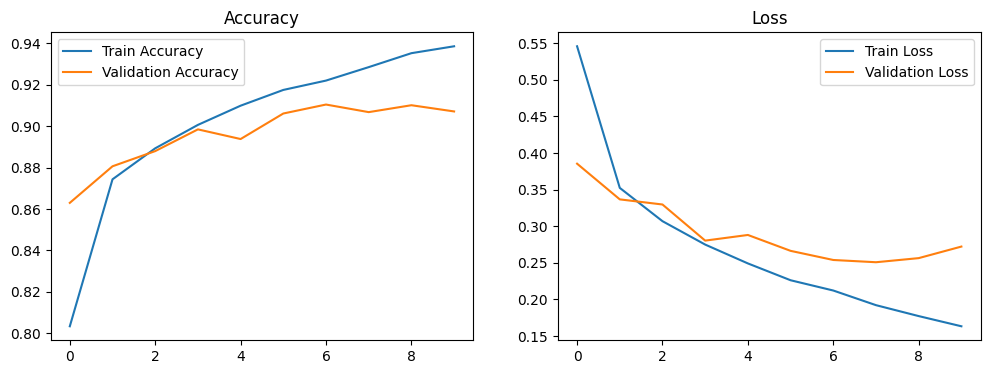

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.legend()

plt.show()
